<a href="https://colab.research.google.com/github/amandasmagalhaes/metodos-estatisticos-epidemio/blob/main/3.%20Regress%C3%A3o%20Linear%20Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**


&nbsp;


A regressão linear é usada para testar a relação entre as variáveis ​​independentes e uma variável dependente contínua. O modelo de regressão geral precisa ser significativo antes de olharmos para os próprios coeficientes individuais. A significância do modelo é medida pela estatística F e um valor p correspondente. Se a estatística F geral não for significativa, indica que o modelo atual não é melhor do que usar o valor médio da variável dependente para prever o resultado.

Os modelos de regressão são úteis porque permitem ver quais variáveis ​​são importantes, ao mesmo tempo em que leva em consideração outras variáveis ​​que também podem influenciar o resultado. Além disso, uma vez que um modelo de regressão é decidido, há uma boa quantidade de trabalho pós-estimativa adicional que pode ser feito para explorar ainda mais o(s) relacionamento(s) que podem estar presentes.

Como a regressão linear é um teste paramétrico, ela tem as suposições de teste paramétricas típicas. Além disso, há uma preocupação adicional de multicolinearidade. Embora a multicolinearidade não seja uma suposição do modelo de regressão, é um aspecto que precisa ser verificado. A multicolinearidade ocorre quando uma variável independente pode ser prevista, com boa precisão, por outra variável independente no mesmo modelo. A multicolinearidade é uma preocupação porque enfraquece a significância das variáveis ​​independentes.

Para esta demonstração, o valor p convencional de 0,05 será usado.


&nbsp;


## **Suposições de teste paramétrico**

* As distribuições da população são normais (Normalidade)
* As amostras têm variâncias iguais (Homocedasticidade)
* Independência

A estatística de teste é a estatística F quee compara o quadrado médio da regressão (MSR) ao quadrado médio do erro (MSE). MSR também é conhecido como o quadrado médio do modelo.

Rejeita-se a hipótese nula, H0, se a estatística F calculada for maior do que a estatística F crítica. A estatística F crítica é determinada pelos graus de liberdade e alfa valor.

Antes de ser tomada a decisão de aceitar ou rejeitar a hipótese nula, as premissas precisam ser verificadas.

### Exemplo
Vinte e cinco pacientes são atendidos em uma clínica oftalmológica e as medidas são registradas para pressão intra-ocular (PIO) e idade.

In [26]:
# Bibliotecas


# Análise de Dados
!pip install researchpy
import researchpy as rp
import pandas as pd
import numpy as np

# Correlação de Pearson
from scipy import stats

# Regressão Linear
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Normalidade
#import scipy.stats as stats

# Vizualização
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
# Banco de dados

df = pd.read_csv('http://www.est.ufmg.br/~enricoc/pdf/avancados_medicina/dados_aula3.txt', delimiter= '\s+')

## **Análise Descritiva**

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   idade   25 non-null     int64
 1   pio     25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [5]:
df.rename(columns={'idade':'Idade', 'pio':'PIO'}, inplace=True)

In [6]:
df.head()

,Idade,PIO
0,35,15
1,40,17
2,41,16
3,44,18
4,45,15


In [7]:
df.tail()

,Idade,PIO
20,63,23
21,65,24
22,67,23
23,71,24
24,77,22


In [8]:
df.describe().round(2)

,Idade,PIO
count,25.00,25.00
mean,54.88,19.44
std,9.87,2.72
min,35.00,15.00
25%,50.00,18.00
50%,55.00,19.00
75%,60.00,22.00
max,77.00,24.00


In [9]:
round(rp.summary_cont(df['Idade']), 2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Idade,25.0,54.88,9.87,1.97,50.81,58.95


In [10]:
round(rp.summary_cont(df['PIO']), 2)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,PIO,25.0,19.44,2.72,0.54,18.32,20.56


### **Verificando dados ausentes**

In [11]:
df.isnull().values.any()
df.isnull().sum()

Idade    0
PIO      0
dtype: int64

## **Correlação**

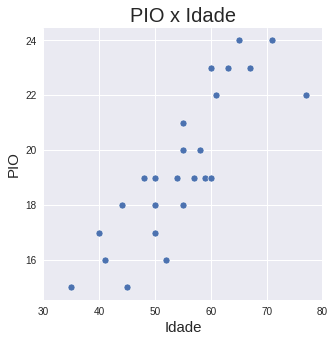

In [47]:
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'Idade', y = 'PIO', data = df)

plt.xticks([30, 40, 50, 60, 70, 80], labels = [30, 40, 50, 60, 70, 80])

#plt.xlabel('')
#plt.ylabel('')
#plt.legend('')
plt.title('PIO x Idade', fontsize = 20)

plt.show()

O gráfico de dispersão indica uma possível correlação positiva entre as variéveis. Ou seja, os mais velhos estão associados com valores de PIO mais altos


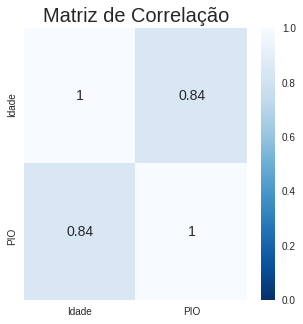

In [48]:
plt.figure(figsize = (5, 5))
corr = df.corr()
sns.heatmap(corr, annot = True, vmin = 0, vmax = 1, cmap = 'Blues_r')
plt.title('Matriz de Correlação', fontsize = 20)
plt.show()

In [14]:
round(df['Idade'].corr(df['PIO']), 2)

0.84

In [15]:
# Valor de correlação de Pearson
corr = stats.pearsonr(df['Idade'], df['PIO'])
corr #Primeiro valor na tupla é o valor de correlação e o segundo é o valor p

# Transformação Fisher para obter z
z = np.arctanh(corr[0])
z

# Valor sigma (erro padrão)
sigma = (1/((len(df.index)-3)**0.5))
sigma

# Função de densidade de probabilidade de intervalo normal de 95% para variável aleatória contínua normal
cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)

# Pegue a tangente hiperbólica para obter valores do intervalo de confiança de 95%
np.tanh(cint).round(2)

array([0.68, 0.93])

O coeficiente de correlação de Pearson é o mais utilizado para medir a intensidade da associação entre duas variáveis quantitativas.

## **Regressão Linear**

In [29]:
model = smf.ols('PIO ~ Idade', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIO   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     57.34
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.09e-07
Time:                        21:46:29   Log-Likelihood:                -44.386
No. Observations:                  25   AIC:                             92.77
Df Residuals:                      23   BIC:                             95.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6432      1.716      3.871      0.001       3.093      10.193
Idade          0.2332      0.031      7.572      0.000       0.169       0.297
==============================================================================
Omnibus:                        1.684   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.237
Skew:                          -0.314   Prob(JB):                        0.539
Kurtosis:                       2.109   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Omnibus:** Testes de normalidade de resíduos
* **Prob (Omnibus):** Valor P associado ao teste Omnibus

**Skew:** O valor indica a inclinação, para facilitar a explicação, da distribuição

**Kurtosis:** O valor indica a nitidez do pico da distribuição

**Durbin-Watson:** Testes de autocorrelação nos resíduos. Infelizmente, não é fornecida uma tabela para valores críticos, mas há alguns disponíveis por meio de uma pesquisa do Google

**Jarque-bera (JB):** Outro teste para normalidade de resíduos
* **Prob (JB):** Valor P associado à estatística de teste JB

**Cond. No.:** Um teste de multicolinearidade e instabilidade de estimativa

Usando essas informações, pode-se avaliar o modelo de regressão.  
* Method	Least Squares: O Método dos Mínimos Quadrados é o mais utilizado para obter as estimativas. Este método obtem a reta com as menores distâncias entre os valores observados (y) e a própria reta.
* R-squared: = 71% da variação dos dados está sendo explicada pela reta de regressão.
* Prob (F-statistic): O modelo global atual é significativo, o que indica que é melhor do que usar a média para prever a PIO.
* Idade: O aumento em ano na idade, aumenta a PIO média em 0,23 (IC; 95% 0,17; 0,29) mmHg. Ou o aumento em quatro anos na idade, aumenta a PIO média em cerca de 1 mmHg (IC; 95% 0,68; 1,16) mmHg.

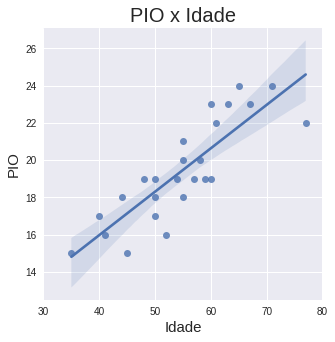

In [17]:
plt.figure(figsize = (5, 5))
sns.regplot(x = 'Idade', y = 'PIO', data = df, lowess = False)

plt.xticks([30, 40, 50, 60, 70, 80], labels = [30, 40, 50, 60, 70, 80])

#plt.xlabel('')
#plt.ylabel('')
#plt.legend('')
#PÎO = 6,64 + 0,23 X idade'
plt.title('PIO x Idade', fontsize = 20)

plt.show()

#Seaborn calcula e plota um ajuste de modelo de regressão linear, junto com uma banda translúcida de intervalo de confiança de 95%.

### **Gráficos para verificar a adequação do ajuste**

In [32]:
model1 = sm.OLS(df['PIO'], sm.add_constant(df['Idade']))
model_fit = model1.fit()
dataframe = pd.concat([df['Idade'], df['PIO']], axis=1)

#### **Residuals vs Fittes (Gráfico de resíduos vs preditos): Homocedasticidade e linearidade**
O primeiro é o gráfico Residuals vs Fitted. Este gráfico mostra se há algum padrão não linear nos resíduos e, portanto, também nos dados. Uma das suposições matemáticas na construção de um modelo OLS é que os dados podem ser ajustados por uma linha. Se essa suposição for mantida e nossos dados puderem ser ajustados por um modelo linear, devemos ver uma linha relativamente plana ao olhar para os resíduos vs ajustados.  
Um gráfico de Resíduos vs Ajustado ideal parecerá com ruído aleatório; não haverá nenhum padrão aparente no gráfico de dispersão e a linha vermelha será horizontal.
* Os pontos devem ficar aleatoriamente distribuídos em torno de uma linha horizontal paralela ao eixo x na altura do resíduo zero.
* A violação do pressuposto de homocedasticidade produz faixas em forma de cone, enquanto violações do pressuposto de linearidade produz faixas não-lineares.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

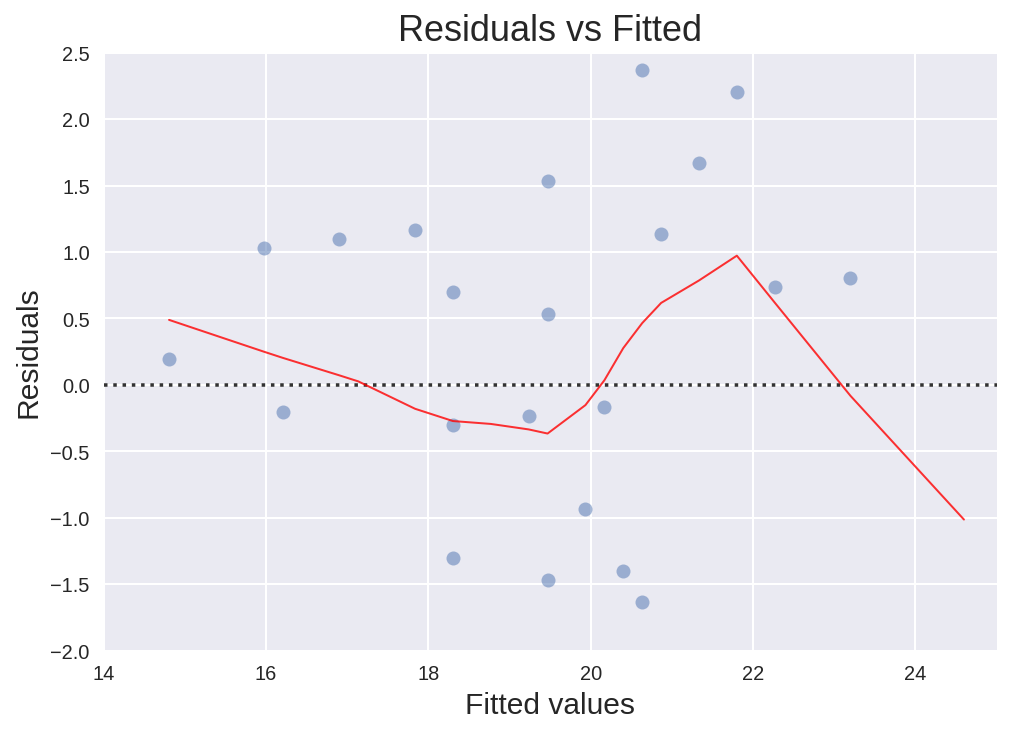

In [77]:
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_xlim(14, 25)
plot_lm_1.axes[0].set_ylim(-2, 2.5)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

#### **Gráfico Normal Q-Q: Normalidade: gráfico de probabilidade dos resíduos**
Este gráfico mostra se os resíduos são normalmente distribuídos. Um bom gráfico de QQ normal tem todos os resíduos situados na linha vermelha ou próximos a ela.
* Os pontos deve ficar distribuídos ao longo da reta y = x.

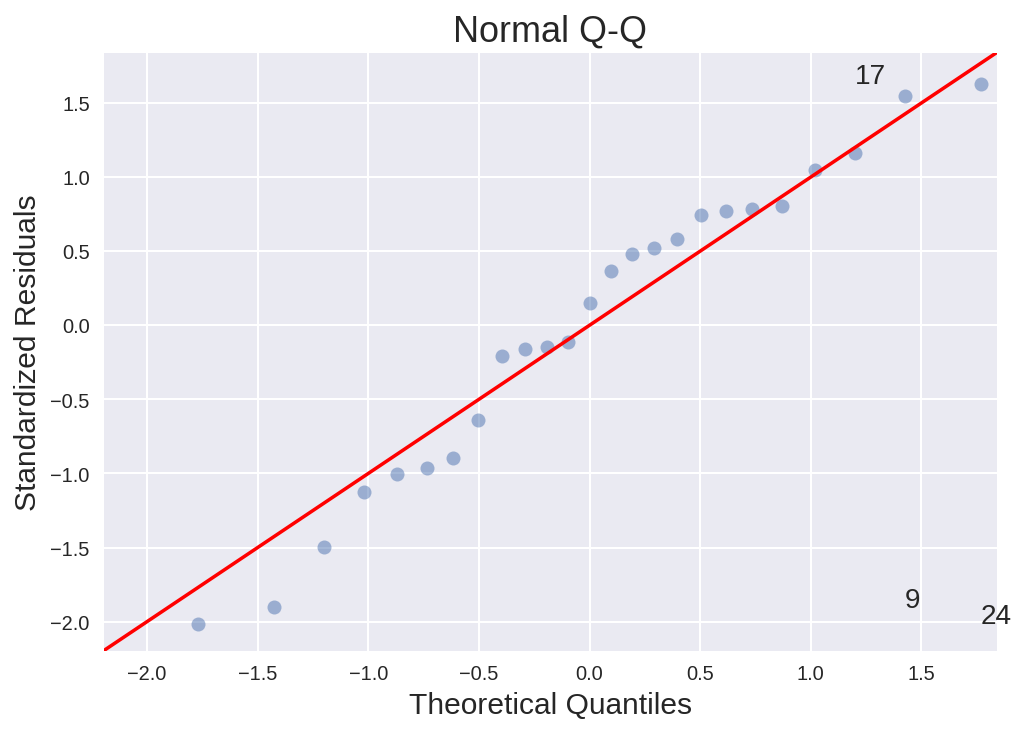

In [89]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

#### **Scale-Location: Homocedasticidade**
Este gráfico é uma forma de verificar se os resíduos sofrem de variância não constante, também conhecida como heterocedasticidade.
* Os pontos devem ficar aleatoriamente distribuídos em torno de uma linha horizontal paralela ao eixo x mas não do valor zero

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


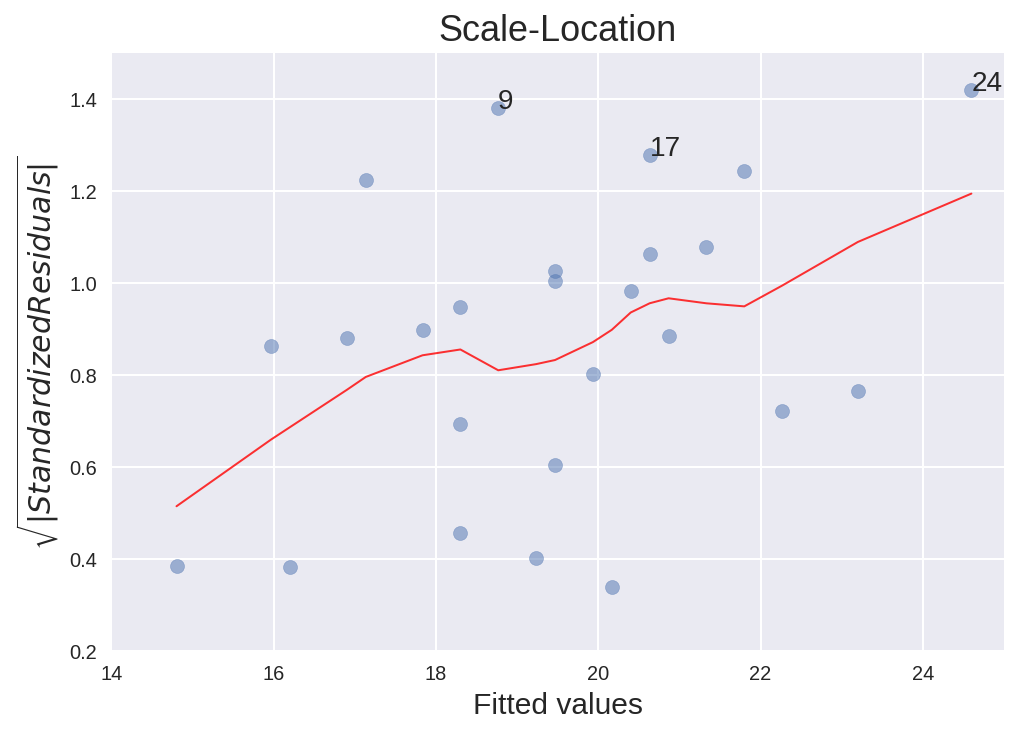

In [79]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_xlim(14, 25)
plot_lm_3.axes[0].set_ylim(0.2, 1.5)
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(model_fitted_y[i],
                             model_norm_residuals_abs_sqrt[i]));

#### **Residuals vs Leverage**

Os pontos de alavancagem são prejudiciais. Ao contrário de outliers, que têm um invulgarmente grande y  valor, os pontos de alavancagem têm extremos x valores Isso pode não parecer tão ruim no valor de face, mas pode ter efeitos prejudiciais no modelo porque o β os coeficientes são muito sensíveis aos pontos de alavancagem.  
O objetivo do gráfico Resíduos vs Alavancagem é identificar essas observações problemáticas.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


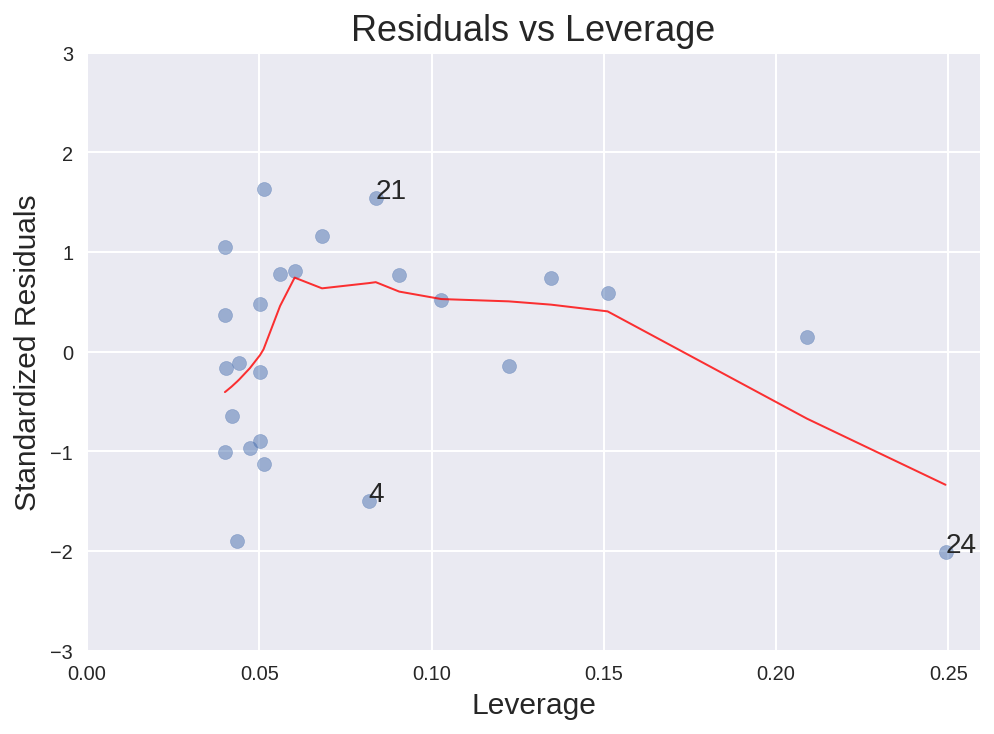

In [80]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 3)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
                             xy=(model_leverage[i],
                             model_norm_residuals[i]));

## **Verificação das Suposições**

### **Independência**

Esta suposição é testada quando o estudo é desenhado. O que isso significa é que todos os grupos são mutuamente exclusivos, ou seja, um indivíduo só pode pertencer a um grupo. Além disso, isso significa que os dados não são medidas repetidas (não são coletados ao longo do tempo). Neste exemplo, essa condição foi atendida.

### **Normalidade**

A suposição de normalidade é testada nos resíduos do modelo ao vir de uma ANOVA ou estrutura de regressão. Um método para testar a suposição de normalidade é o teste de Shapiro-Wilk. Isso pode ser concluído usando o método shapiro() de scipy.stats. Certifique-se de que scipy.stats seja importado para que o método a seguir funcione. Infelizmente, a saída não é rotulada, mas é (estatística de teste W, valor p).

In [37]:
stats.shapiro(model.resid)

(0.9592304229736328, 0.39935964345932007)

O teste não é significativo, W = 0,9592, p = 0,3994, o que indica que os resíduos estão normalmente distribuídos.

Outra forma de testar a suposição é por meio de uma verificação visual - isso é útil quando a amostra é grande. A razão disso ser verdade é que, à medida que o tamanho da amostra aumenta, a capacidade do teste estatístico de rejeitar a hipótese nula aumenta, ou seja, ele ganha poder para detectar diferenças menores à medida que o tamanho da amostra n aumenta.

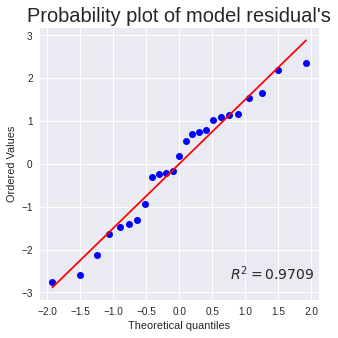

In [53]:
plt.figure(figsize = (5, 5))
normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue = True)
plt.title("Probability plot of model residual's", fontsize = 20)

plt.show()

### **Homogeneidade de Variância**

A suposição é que todos os grupos têm variâncias iguais. Um método para testar essa suposição é o teste de Levene de homogeneidade de variâncias. Isso pode ser concluído usando o método levene() de Scipy.stats.

In [64]:
import statsmodels.stats.api as sms

breuschpagan_test = sms.het_breuschpagan(model.resid, model.model.exog)
breuschpagan_test

(3.0230047054755986,
 0.08209123984795343,
 3.163722214713402,
 0.08851379732765881)